In [1]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from xbout import open_boutdataset
import xhermes
from boututils.run_wrapper import shell
import time
import shutil

# This comes from https://github.com/mikekryjak/sdtools
sys.path.append(os.path.join(r"C:\Users\Mike\OneDrive\Project\python-packages\sdtools"))
# from hermes3.grid_fields import *

# This is notebook stuff, it auto re-imports packages 
# %matplotlib qt
%load_ext autoreload
%autoreload 2

# Auto generate examples

In [3]:
script_path = r"C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\examples\tokamak\tokamak_example.py"
input_file_path = os.path.dirname(script_path)

yaml_sn = r"C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\examples\tokamak\single-null.yaml"
yaml_cdn = r"C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\examples\tokamak\connected-double-null.yaml"
yaml_ddn = r"C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\examples\tokamak\disconnected-double-null.yaml"

all_grid_path = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\Hypnotoad_examples"

# geometries = ["lsn", "usn", "cdn", "udn", "udn2"]
geometries = ["ldn"]
# geometries = ["lsn"]
set_guards = [False, True]
# set_guards = [True]

for guards in set_guards:
    for geometry in geometries:
        print(f"Generating grid for geometry: {geometry}, guards: {guards}")
        time_start = time.time()
        try:
        
            if guards:
                # grid_path  = os.path.join(all_grid_path, f"example_{geometry}_reversed_current.grd.nc")
                grid_name = f"example_{geometry}.grd.nc"
                _, out = shell(f"cd {input_file_path} && python {script_path} {geometry} --no-plot", 
                            pipe = True)
                
            else:
                # grid_path  = os.path.join(all_grid_path, f"example_{geometry}_reversed_current_noguards.grd.nc")
                grid_name = f"example_{geometry}_noguards.grd.nc"
                _, out = shell(f"cd {input_file_path} && python {script_path} {geometry} --no-plot --no-guards", 
                            pipe = True)
                
            try:
                os.remove(os.path.join(all_grid_path, "bout.grd.nc"))
            except FileNotFoundError:
                pass
            
            try:
                os.remove(os.path.join(all_grid_path, grid_name))
            except FileNotFoundError:
                pass
            
            
            shutil.move(os.path.join(input_file_path, "bout.grd.nc"), all_grid_path)
            os.rename(os.path.join(all_grid_path, "bout.grd.nc"), os.path.join(all_grid_path, grid_name))
            
            time_end = time.time()
            
        except KeyboardInterrupt:
            print("Interrupted")
            time_end = time.time()
            sys.exit(0)
            
        print(f"Completed in {time_end - time_start:.2f} seconds")


Generating grid for geometry: ldn, guards: False
Completed in 41.04 seconds
Generating grid for geometry: ldn, guards: True
Completed in 64.24 seconds


In [4]:
grid = xhermes.HypnotoadGrid(r"C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\examples\tokamak\bout.grd.nc")
grid["dx"]

masked_array(
  data=[[0.00977322, 0.00977322, 0.00977322, 0.00977322, 0.02363756,
         0.02363756, 0.02363756, 0.02363756, 0.02363756, 0.02363756,
         0.02363756, 0.02363756, 0.00977322, 0.00977322, 0.00977322,
         0.00977322],
        [0.00704581, 0.00704581, 0.00704581, 0.00704581, 0.01545533,
         0.01545533, 0.01545533, 0.01545533, 0.01545533, 0.01545533,
         0.01545533, 0.01545533, 0.00704581, 0.00704581, 0.00704581,
         0.00704581],
        [0.00500025, 0.00500025, 0.00500025, 0.00500025, 0.00931865,
         0.00931865, 0.00931865, 0.00931865, 0.00931865, 0.00931865,
         0.00931865, 0.00931865, 0.00500025, 0.00500025, 0.00500025,
         0.00500025],
        [0.00363655, 0.00363655, 0.00363655, 0.00363655, 0.00522754,
         0.00522754, 0.00522754, 0.00522754, 0.00522754, 0.00522754,
         0.00522754, 0.00522754, 0.00363655, 0.00363655, 0.00363655,
         0.00363655],
        [0.00295469, 0.00295469, 0.00295469, 0.00295469, 0.00318198,
 

In [13]:
shutil.move?

Signature: shutil.move(src, dst, copy_function=<function copy2 at 0x000002D8AA7DA3E0>)
Docstring:
Recursively move a file or directory to another location. This is
similar to the Unix "mv" command. Return the file or directory's
destination.

If dst is an existing directory or a symlink to a directory, then src is
moved inside that directory. The destination path in that directory must
not already exist.

If dst already exists but is not a directory, it may be overwritten
depending on os.rename() semantics.

If the destination is on our current filesystem, then rename() is used.
Otherwise, src is copied to the destination and then removed. Symlinks are
recreated under the new name if os.rename() fails because of cross
filesystem renames.

The optional `copy_function` argument is a callable that will be used
to copy the source or it will be delegated to `copytree`.
By default, copy2() is used, but any function that supports the same
signature (like copy()) can be used.

A lot more could

In [7]:
status, out = shell(f"cd {input_file_path} && move bout.grd.nc {grid_path}")
print(status)

0


In [6]:
input_file_path

'C:\\Users\\mikek\\OneDrive\\Project\\python-packages\\Hypnotoad\\examples\\tokamak'

# Old

In [31]:
def create_tokamak(geometry="lsn", nx=65, ny=65):
    """
    Create an example, based on a simple analytic form for the poloidal flux.

    Inputs
    ------

    geometry  string    lsn, usn, cdn, udn, ldn, udn2
    nx        int       Number of points in major radius
    ny        int       Number of points in height

    Returns
    -------

    r1d[nx]       1D array of major radius [m]
    z1d[ny]       1D array of height [m]
    psi2d[nx,ny]  2D array of poloidal flux [Wb]
    """

    r1d = np.linspace(1.0, 2.0, nx)
    z1d = np.linspace(-0.7, 0.7, ny)
    r2d, z2d = np.meshgrid(r1d, z1d, indexing="ij")

    r0 = 1.5
    z0 = 0.3

    psi_functions = {
        "lsn": lambda R, Z: (
            np.exp(-((R - r0) ** 2 + (Z + z0 - 0.3) ** 2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z + z0 + 0.3) ** 2) / 0.3**2)
        ),
        "usn": lambda R, Z: (
            np.exp(-((R - r0) ** 2 + (Z - z0 - 0.3) ** 2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z - z0 + 0.3) ** 2) / 0.3**2)
        ),
        "cdn": lambda R, Z: (
            np.exp(-((R - r0) ** 2 + Z**2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z + 2 * z0) ** 2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z - 2 * z0) ** 2) / 0.3**2)
        ),
        "udn": lambda R, Z: (
            np.exp(-((R - r0) ** 2 + Z**2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z + 2 * z0 + 0.002) ** 2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z - 2 * z0) ** 2) / 0.3**2)
        ),
        "ldn": lambda R, Z: (
            -np.exp(-((R - r0) ** 2 + Z**2) / 0.3**2)
            - np.exp(-((R - r0) ** 2 + (Z + 2 * z0) ** 2) / 0.3**2)
            - np.exp(-((R - r0) ** 2 + (Z - 2 * z0 - 0.003) ** 2) / 0.3**2)
        ),
        # Double null, but with the secondary far from the plasma edge
        "udn2": lambda R, Z: (
            np.exp(-((R - r0) ** 2 + Z**2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z + 2 * z0 + 0.02) ** 2) / 0.3**2)
            + np.exp(-((R - r0) ** 2 + (Z - 2 * z0) ** 2) / 0.3**2)
        ),
    }

    if geometry not in psi_functions:
        raise ValueError(
            "geometry not recognised. Choices are {}".format(psi_functions.keys())
        )

    psi_func = psi_functions[geometry]

    return r1d, z1d, psi_func(r2d, z2d), psi_func(np.linspace(r0, 1.2 * r0, nx), 0.0)

r1d, z1d, psi2d, psi1d = create_tokamak(
        geometry="lsn",
        nx=65,
        ny=65,
    )

inputfile = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\Hypnotoad_examples\single-null.yaml"

with open(inputfile, "r") as file:
        options = yaml.safe_load(file)
        
options.update(reverse_current=True)


Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_extend                                        |  0.0             (default)  
leg_extend_lower_inner                            |  0.0             (default)  
leg_extend_lower_outer                            |  0.0             (default)  
leg_extend_upper_in

Found X-point at psi = -0.7357596127915077, psi_norm = 1.0
Generating a lower single null

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
cap_Bp_ylow_xpoint                                |  False           (default)  
curvature_smoothing                               |  None            (default)  
curvature_type                                    |  curl(b/B)       (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
follow_per

C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\cases\tokamak.py:398: UserWarning: Reversing the sign of the poloidal field
  warnings.warn("Reversing the sign of the poloidal field")
c:\Users\mikek\pyenvs\fusion-3.12.11\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


creating region 0 - inner_lower_divertor(0)
creating region 1 - inner_lower_divertor(1)
creating region 2 - core(0)
creating region 3 - core(1)
creating region 4 - outer_lower_divertor(0)
creating regionndicular: 9 5 - outer_lower_divertor(1)
Get RZ valuespendicular: 9
Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances core(0)ur distances: 11
Distances core(1)ur distances: 11
Distances outer_lower_divertor(0)
Distances outer_lower_divertor(1)
1 inner_lower_divertor(0)nces: 11
1 inner_lower_divertor(1)
1 core(0)
1 core(1)
1 outer_lower_divertor(0)
1 outer_lower_divertor(1)
Calculate zShiftrtor(1) calcHy 10 / 11
Calculate Metricrtor(1)divertor(1)
DataFile: None passed as data to write. Ignoring
DataFile: None passed as data to write. Ignoring


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1944: RuntimeWarning: invalid value encountered in divide
  result.xlow[1:-1, :] = (f.centre[1:, :] - f.centre[:-1, :]) / self.dx.xlow[
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1951: RuntimeWarning: invalid value encountered in divide
  result.xlow[0, :] = (f.centre[0, :] - f.xlow[0, :]) / (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1956: RuntimeWarning: invalid value encountered in divide
  result.xlow[-1, :] = (f_outer - f.centre[-1, :]) / self.dx.xlow[-1, :]
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1967: RuntimeWarning: invalid value encountered in divide
  result.corners[1:-1, :] = (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1974: RuntimeWarning: invalid value encountered in divide
  result.corners[0, :] = (f.ylow[0, :] - f.corners[0, :]) / (
C:\U

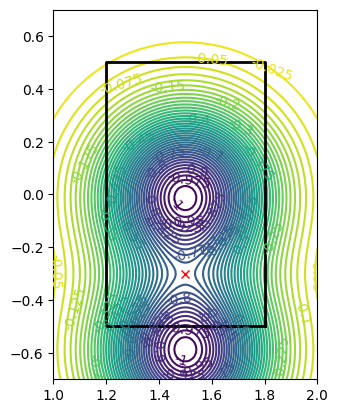

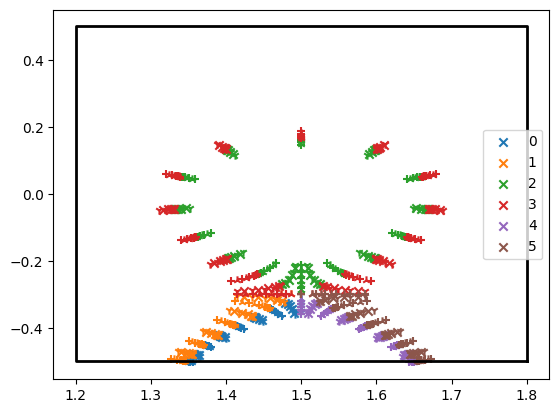

In [32]:
# Put wall inside grid, so that we can have boundary points outside with wall wthout
# hitting extrapolated psi.
wall_extra = 0.2
rmin = min(r1d) + wall_extra
rmax = max(r1d) - wall_extra
zmin = min(z1d) + wall_extra
zmax = max(z1d) - wall_extra

eq = tokamak.TokamakEquilibrium(
    r1d,
    z1d,
    psi2d,
    psi1d,
    fpol1D=[],
    settings=options,
    wall=[(rmin, zmin), (rmin, zmax), (rmax, zmax), (rmax, zmin)],
)

from hypnotoad.core.mesh import BoutMesh

mesh = BoutMesh(eq, options)
mesh.geometry()
mesh.writeGridfile("bout.grd.nc")

import matplotlib.pyplot as plt

eq.plotPotential(ncontours=40)
eq.plotWall()

plt.plot(*eq.x_points[0], "rx")

mesh.plotPoints(xlow=True, ylow=True, corners=True)
eq.plotWall()

plt.show()

In [39]:
grid = xhermes.HypnotoadGrid(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\Hypnotoad_examples\bout.grd.nc")
grid["g_22"]

masked_array(
  data=[[0.00446044, 0.00796513, 0.00670983, 0.00139661, 0.00253593,
         0.02678085, 0.04840171, 0.05893358, 0.05893358, 0.04840171,
         0.02678085, 0.00253593, 0.00139661, 0.00670983, 0.00796513,
         0.00446044],
        [0.00455942, 0.00813582, 0.00711605, 0.00194025, 0.00397522,
         0.02904226, 0.05191828, 0.06462856, 0.06462856, 0.05191828,
         0.02904226, 0.00397522, 0.00194026, 0.00711605, 0.00813582,
         0.00455942],
        [0.00462873, 0.00824765, 0.00734425, 0.00258172, 0.00563098,
         0.03019625, 0.05414201, 0.06831588, 0.06831588, 0.05414201,
         0.03019625, 0.00563098, 0.00258172, 0.00734425, 0.00824765,
         0.00462873],
        [0.00467762, 0.00832241, 0.00746359, 0.00332407, 0.00730623,
         0.03074423, 0.05544634, 0.0705101 , 0.0705101 , 0.05544634,
         0.03074423, 0.00730623, 0.00332407, 0.00746359, 0.00832241,
         0.00467762],
        [0.00471448, 0.00837639, 0.00752602, 0.00433482, 0.009081  ,
 

In [8]:
import netCDF4 as nc

with nc.Dataset(r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\tokamak\hypnotoad_example_lsn_5x10.nc") as ds:
    # [print(x) for x in ds.variables.keys()]
    
    for param in ["nx", "ny", "ixseps1", "ixseps2", "jyseps1_1", "jyseps1_2", "jyseps2_1", "jyseps2_2"]:
        print(f"{param}: {ds[param][:]}")

nx: 10
ny: 16
ixseps1: 5
ixseps2: 10
jyseps1_1: 3
jyseps1_2: 8
jyseps2_1: 8
jyseps2_2: 11


# Grid generated using tokamak_example.py in Hypnotoad